# Semi-supervised learning with Bus data

### Import dependencies

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

### Read the data

In [2]:
df = pd.read_csv('data/bus_007_data.csv')
df

ts  ActualEngPercentTorque  EngSpeed  \
0       2022-12-01 03:22:22                    21.0   610.500   
1       2022-12-01 03:22:23                    21.0   612.625   
2       2022-12-01 03:22:24                    21.0   605.875   
3       2022-12-01 03:22:25                    20.0   609.875   
4       2022-12-01 03:22:26                    11.0   658.500   
...                     ...                     ...       ...   
319304  2022-12-12 23:24:35                     7.0     0.000   
319305  2022-12-12 23:24:36                   130.0  8191.875   
319306  2022-12-12 23:24:45                     NaN       NaN   
319307  2022-12-12 23:25:12                     NaN       NaN   
319308  2022-12-12 23:54:30                   130.0  8191.875   

        FrontAxleLeftWheelSpeed  AcceleratorPedalPosition1  \
0                      3.359375                       19.2   
1                      3.929688                       21.2   
2                      4.414062                        5.2   
3                      4.757812                        0.0   
4                      4.156250                        0.0   
...                         ...                        ...   
319304                      NaN                        0.0   
319305                      NaN                        0.0   
319306                      NaN                        NaN   
319307                      NaN                        0.0   
319308                 0.000000                        0.0   

        EnginePercentLoadAtCurrentSpeed  WheelBasedVehicleSpeed  \
0                                  33.0                3.238281   
1                                  33.0                3.914062   
2                                  35.0                4.496094   
3                                  33.0                4.972656   
4                                   0.0                4.324219   
...                                 ...                     ...   
319304                              0.0                     NaN   
319305                              0.0                     NaN   
319306                              NaN                     NaN   
319307                            255.0                     NaN   
319308                            255.0                     NaN   

        EngInstantaneousFuelEconomy  HighResolutionEngTotalFuelUsed  \
0                         16.392578                       88108.841   
1                         25.376953                             NaN   
2                         25.685547                       88108.844   
3                         25.697266                       88108.846   
4                         26.904297                             NaN   
...                             ...                             ...   
319304                          NaN                             NaN   
319305                          NaN                             NaN   
319306                          NaN                             NaN   
319307                          NaN                             NaN   
319308                          NaN                             NaN   

        HighResolutionTripDistance  
0                              NaN  
1                     1.067825e+06  
2                     1.067825e+06  
3                              NaN  
4                     1.067830e+06  
...                            ...  
319304                         NaN  
319305                         NaN  
319306                2.147484e+10  
319307                         NaN  
319308                         NaN  

[319309 rows x 10 columns]

### Basic checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319309 entries, 0 to 319308
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ts                               319309 non-null  object 
 1   ActualEngPercentTorque           304381 non-null  float64
 2   EngSpeed                         304381 non-null  float64
 3   FrontAxleLeftWheelSpeed          215826 non-null  float64
 4   AcceleratorPedalPosition1        265905 non-null  float64
 5   EnginePercentLoadAtCurrentSpeed  265905 non-null  float64
 6   WheelBasedVehicleSpeed           225423 non-null  float64
 7   EngInstantaneousFuelEconomy      103926 non-null  float64
 8   HighResolutionEngTotalFuelUsed   54936 non-null   float64
 9   HighResolutionTripDistance       128015 non-null  float64
dtypes: float64(9), object(1)
memory usage: 24.4+ MB


In [4]:
df.describe().transpose()

count          mean           std  \
ActualEngPercentTorque           304381.0  2.146239e+01  2.491719e+01   
EngSpeed                         304381.0  8.718398e+02  3.057728e+02   
FrontAxleLeftWheelSpeed          215826.0  2.460021e+01  1.453512e+01   
AcceleratorPedalPosition1        265905.0  2.776918e+01  3.468889e+01   
EnginePercentLoadAtCurrentSpeed  265905.0  3.184919e+01  3.816923e+01   
WheelBasedVehicleSpeed           225423.0  2.390620e+01  1.667199e+01   
EngInstantaneousFuelEconomy      103926.0  1.924444e+01  2.685060e+01   
HighResolutionEngTotalFuelUsed    54936.0  8.869178e+04  3.108503e+04   
HighResolutionTripDistance       128015.0  1.768100e+07  5.999475e+08   

                                       min            25%           50%  \
ActualEngPercentTorque               0.000       4.000000  9.000000e+00   
EngSpeed                             0.000     608.250000  8.396250e+02   
FrontAxleLeftWheelSpeed              0.000      13.398438  2.497656e+01   
AcceleratorPedalPosition1            0.000       0.000000  8.800000e+00   
EnginePercentLoadAtCurrentSpeed      0.000       0.000000  6.000000e+00   
WheelBasedVehicleSpeed               0.000      11.636719  2.419141e+01   
EngInstantaneousFuelEconomy          0.000       4.177734  8.021484e+00   
HighResolutionEngTotalFuelUsed   88108.841   88341.615750  8.846698e+04   
HighResolutionTripDistance           0.000  402070.000000  1.080785e+06   

                                          75%           max  
ActualEngPercentTorque           3.400000e+01  1.300000e+02  
EngSpeed                         1.055500e+03  8.191875e+03  
FrontAxleLeftWheelSpeed          3.499219e+01  2.559961e+02  
AcceleratorPedalPosition1        5.000000e+01  1.020000e+02  
EnginePercentLoadAtCurrentSpeed  6.900000e+01  2.550000e+02  
WheelBasedVehicleSpeed           3.481250e+01  2.559961e+02  
EngInstantaneousFuelEconomy      2.013818e+01  1.279980e+02  
HighResolutionEngTotalFuelUsed   8.858677e+04  4.294967e+06  
HighResolutionTripDistance       1.368422e+06  2.147484e+10

### Remove the outliers
About 99.72% of the whole data lies within three standard deviations (<3σ).
To get 3σ, we need to take the scale ~= 1.5

In [5]:
Q1 = df.quantile(0.25) # lower percentile
Q3 = df.quantile(0.75) # upper percentile

# Inter-Quartile Range
IQR = Q3 - Q1

# Any data point less than the Lower Bound or more than the Upper Bound is considered as an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

/var/folders/y9/2t_72qpj4zx5vgcy788__f6m0000gn/T/ipykernel_3464/4214910631.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


#### Check data without outliers

In [6]:
df.describe().transpose()

count           mean            std  \
ActualEngPercentTorque           276727.0      18.738331      20.855895   
EngSpeed                         276727.0     854.389983     266.129758   
FrontAxleLeftWheelSpeed          190685.0      24.317928      14.159762   
AcceleratorPedalPosition1        239454.0      24.944863      32.011138   
EnginePercentLoadAtCurrentSpeed  239454.0      29.503763      36.329877   
WheelBasedVehicleSpeed           198428.0      23.479835      14.794648   
EngInstantaneousFuelEconomy       81798.0      10.863380       9.449214   
HighResolutionEngTotalFuelUsed    47039.0   88462.783523     157.048339   
HighResolutionTripDistance       112450.0  909563.929702  530043.980268   

                                       min            25%           50%  \
ActualEngPercentTorque               0.000       4.000000  9.000000e+00   
EngSpeed                             0.000     608.250000  8.268750e+02   
FrontAxleLeftWheelSpeed              0.000      13.640625  2.460156e+01   
AcceleratorPedalPosition1            0.000       0.000000  4.800000e+00   
EnginePercentLoadAtCurrentSpeed      0.000       0.000000  5.000000e+00   
WheelBasedVehicleSpeed               0.000      12.058594  2.384375e+01   
EngInstantaneousFuelEconomy          0.000       4.441406  7.417969e+00   
HighResolutionEngTotalFuelUsed   88108.841   88347.227500  8.846880e+04   
HighResolutionTripDistance           0.000  406191.250000  1.082810e+06   

                                          75%           max  
ActualEngPercentTorque           3.000000e+01  7.900000e+01  
EngSpeed                         1.035625e+03  1.726375e+03  
FrontAxleLeftWheelSpeed          3.458594e+01  6.736719e+01  
AcceleratorPedalPosition1        4.440000e+01  1.000000e+02  
EnginePercentLoadAtCurrentSpeed  6.200000e+01  1.000000e+02  
WheelBasedVehicleSpeed           3.434375e+01  6.862109e+01  
EngInstantaneousFuelEconomy      1.433789e+01  4.407617e+01  
HighResolutionEngTotalFuelUsed   8.858681e+04  8.874892e+04  
HighResolutionTripDistance       1.363508e+06  1.726780e+06

### Check for missing data

In [7]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in df.columns:
    # count number of rows with missing values
    n_miss = df[column].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    # append to dict
    missing_dict[column] = [n_miss, perc.round()]

missing_df = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_df

N_Missing [-]  Percentage [%]
ts                                           0             0.0
ActualEngPercentTorque                   14455             5.0
EngSpeed                                 14455             5.0
FrontAxleLeftWheelSpeed                 100497            35.0
AcceleratorPedalPosition1                51728            18.0
EnginePercentLoadAtCurrentSpeed          51728            18.0
WheelBasedVehicleSpeed                   92754            32.0
EngInstantaneousFuelEconomy             209384            72.0
HighResolutionEngTotalFuelUsed          244143            84.0
HighResolutionTripDistance              178732            61.0

### Exploratory Data Analysis (EDA)

#### Column correlation

<AxesSubplot: >

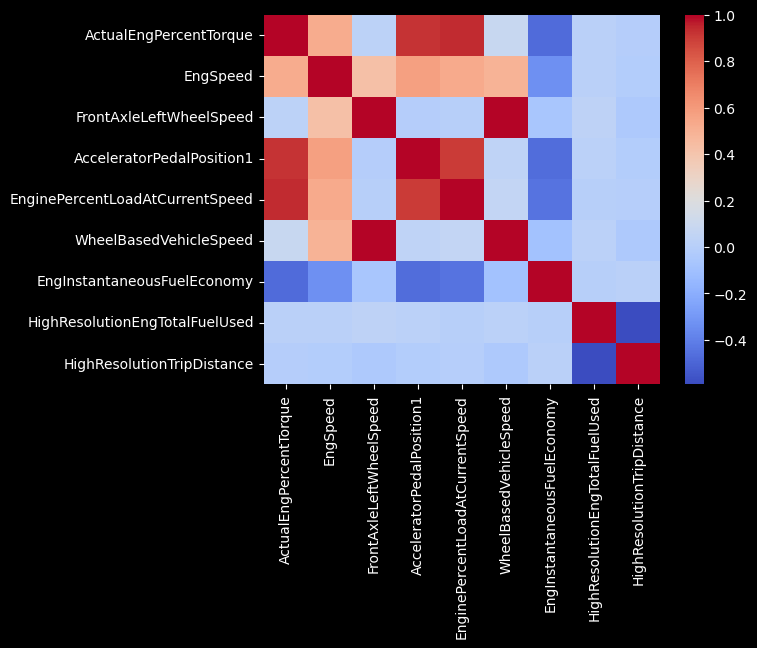

In [8]:
plt.style.use("dark_background")
sns.heatmap(df.corr(), cmap='coolwarm')

The last two columns: HighResolutionEngTotalFuelUsed and HighResolutionTripDistance can be potentially dropped due to small correlation and large number of missing data.

#### Pairwise relationships in a dataset

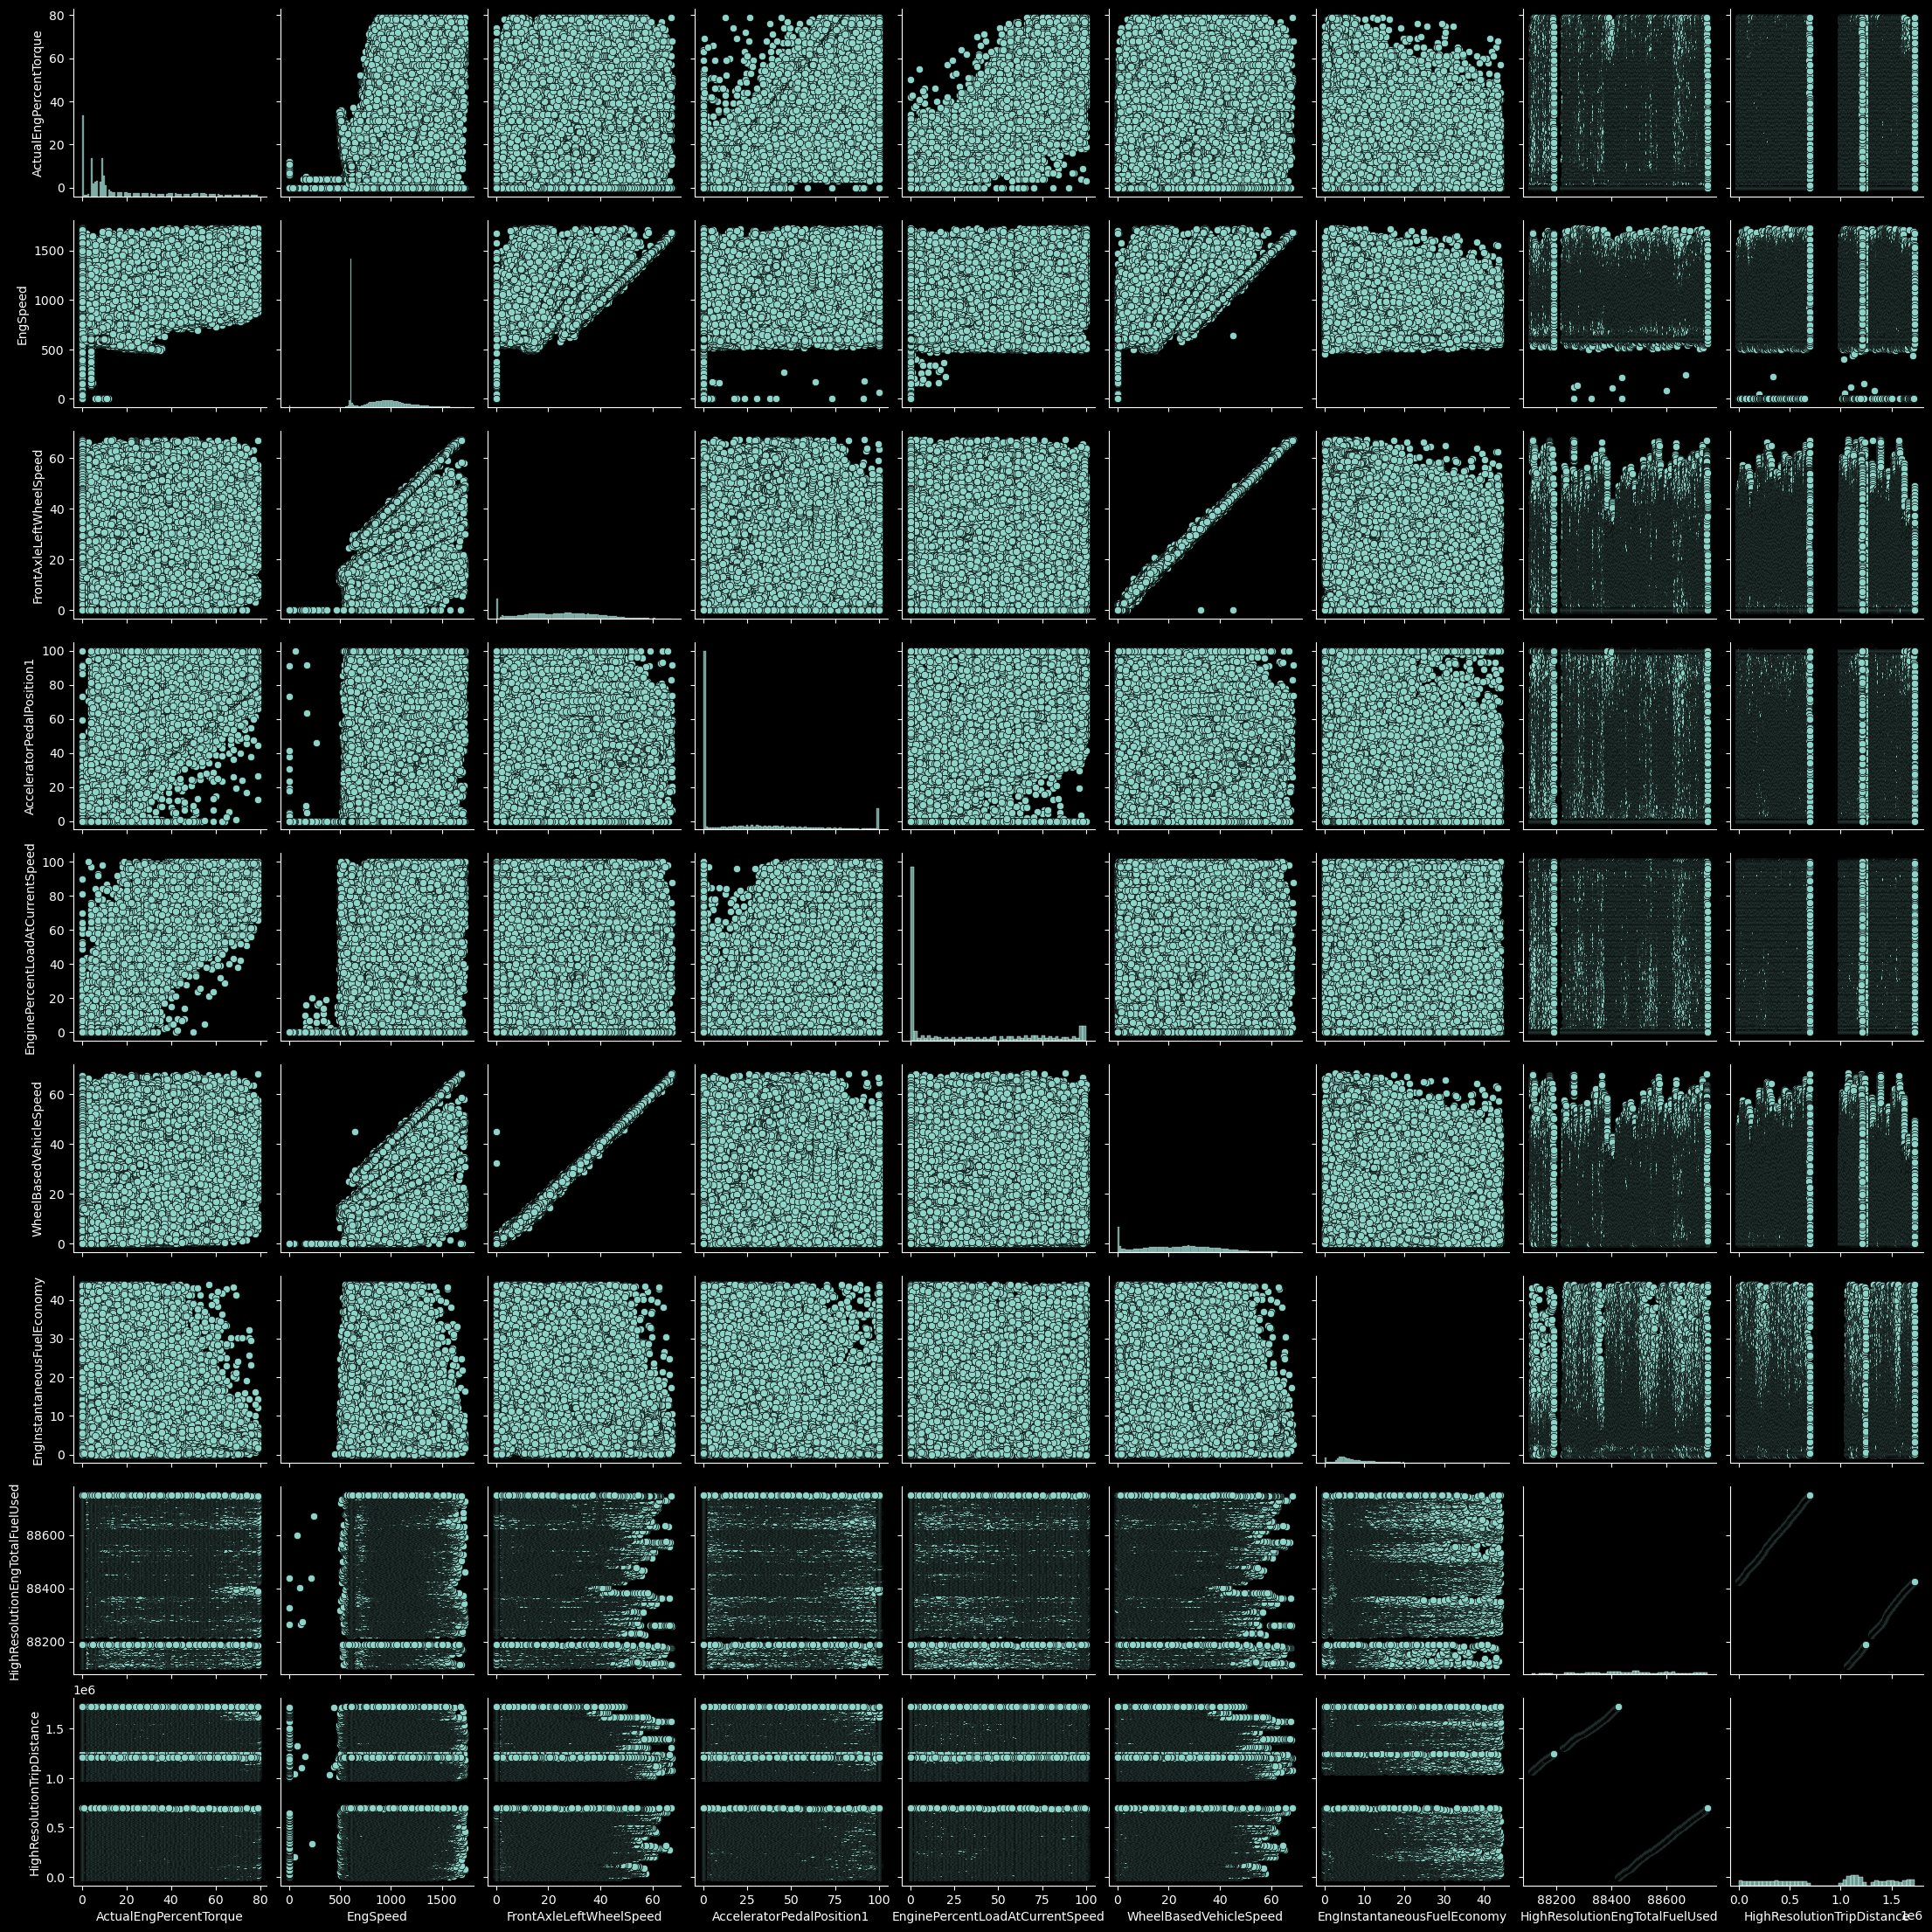

In [9]:
sns.pairplot(df, plot_kws=dict(edgecolor="black"))

### Check rows with no NaN
Train model with the available data, without relying on any imputation first.

In [10]:
df1 = df.dropna(axis = 0)

drop_columns = ['EngInstantaneousFuelEconomy', 
                'ts', 
                'HighResolutionEngTotalFuelUsed', 
                'HighResolutionTripDistance']

X = df1.drop(drop_columns, axis=1)
y = df1.EngInstantaneousFuelEconomy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('R2 score: ', r2_score(y_test, predictions).round(2))

R2 score:  0.54


#### Residuals

(-10.0, 10.0)

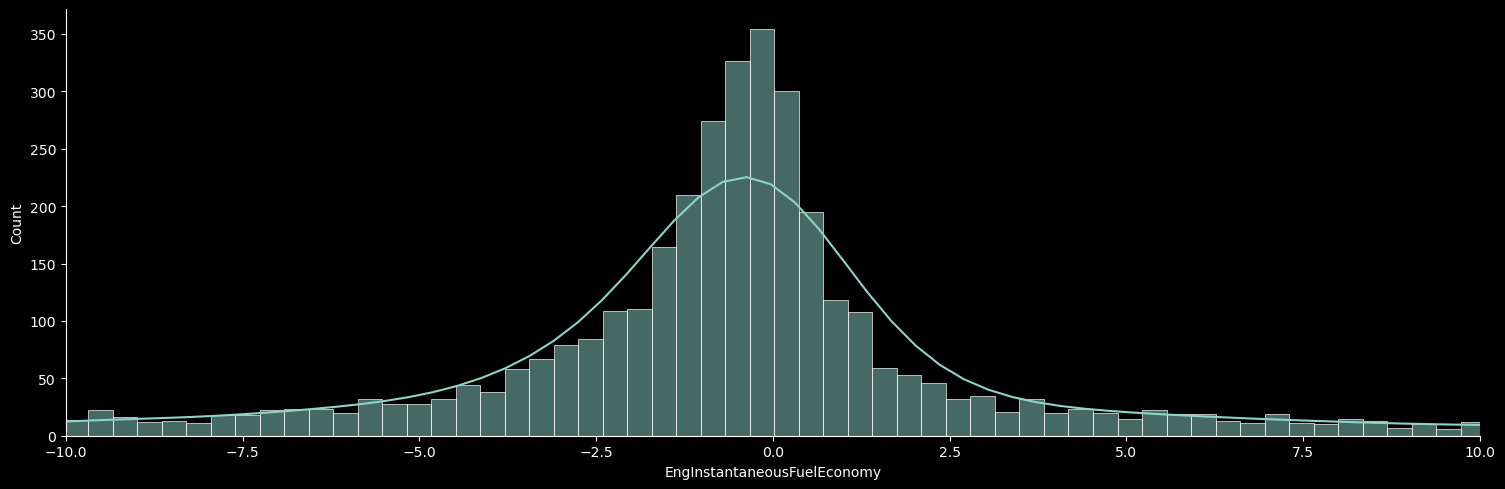

In [11]:
sns.displot(y_test-predictions, aspect=3, kde=True)
plt.xlim(-10, 10)

#### Regression prediction

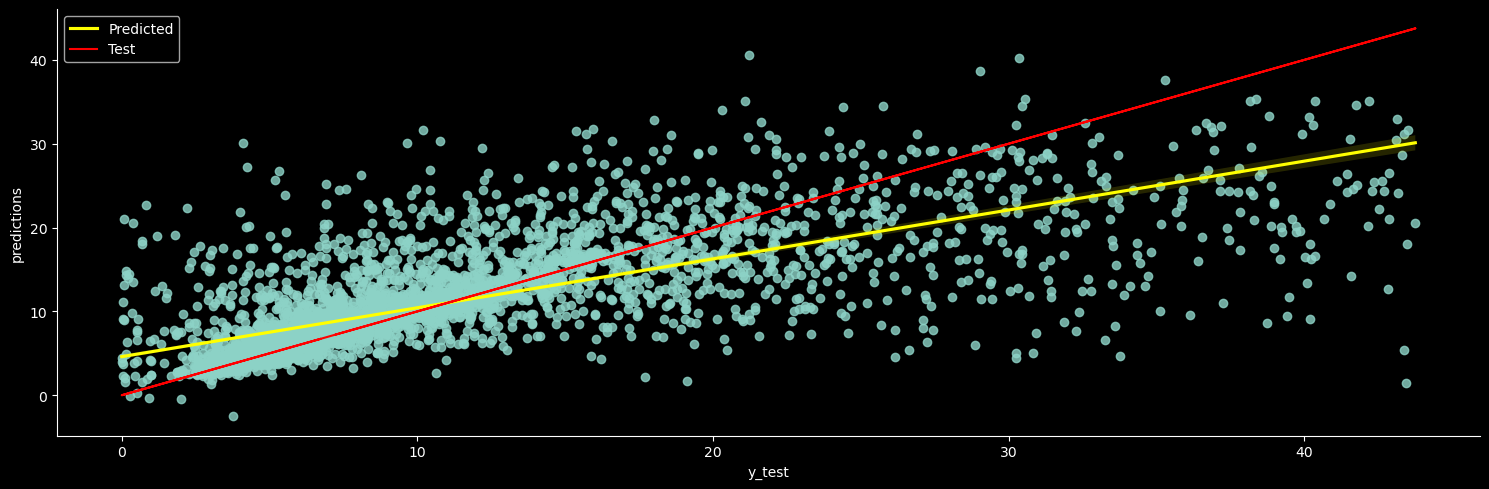

In [12]:
pred_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions})

sns.lmplot(x='y_test', 
           y='predictions', 
           data=pred_df,
           height=5, 
           aspect=3,
           fit_reg=True,
           line_kws={'color': 'yellow', 'label':'Predicted'}
           )

plt.plot(y_test, y_test, c='red', label='Test')

plt.legend()

#### ActualEngPercentTorque [%]
The calculated output torque of the engine.

<AxesSubplot: xlabel='ActualEngPercentTorque', ylabel='Density'>

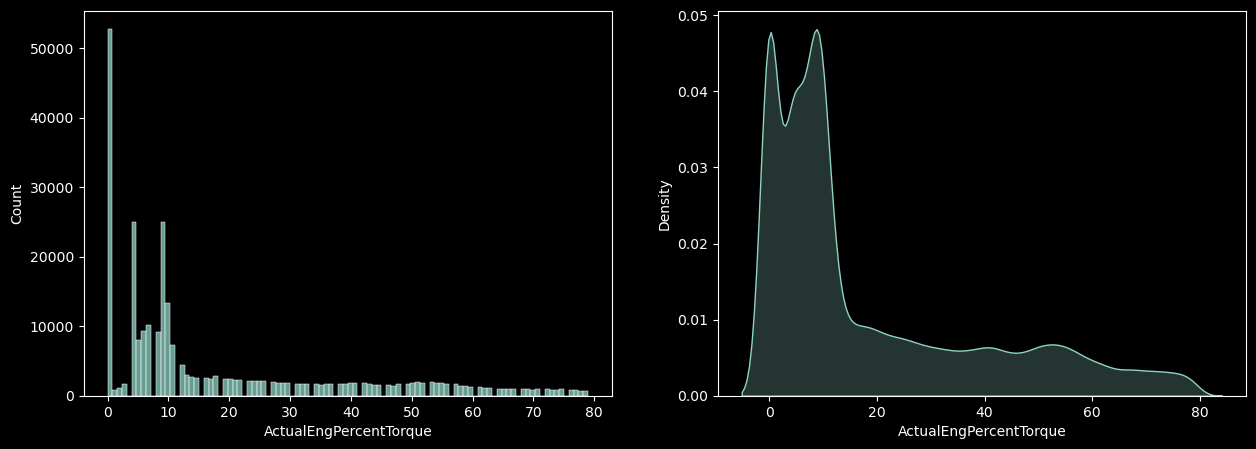

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.ActualEngPercentTorque, ax=ax[0])
sns.kdeplot(df.ActualEngPercentTorque, fill=True, ax=ax[1])

<AxesSubplot: >

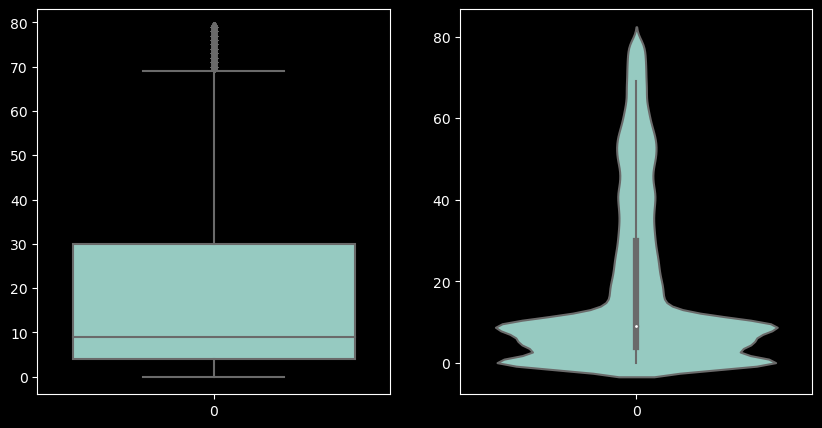

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.ActualEngPercentTorque, ax=ax[0])
sns.violinplot(df.ActualEngPercentTorque, ax=ax[1])

#### EngSpeed [RPM]
Actual engine speed which is calculated over a minimum crankshaft angle of 720 degrees divided by the number of cylinders.

<AxesSubplot: xlabel='EngSpeed', ylabel='Density'>

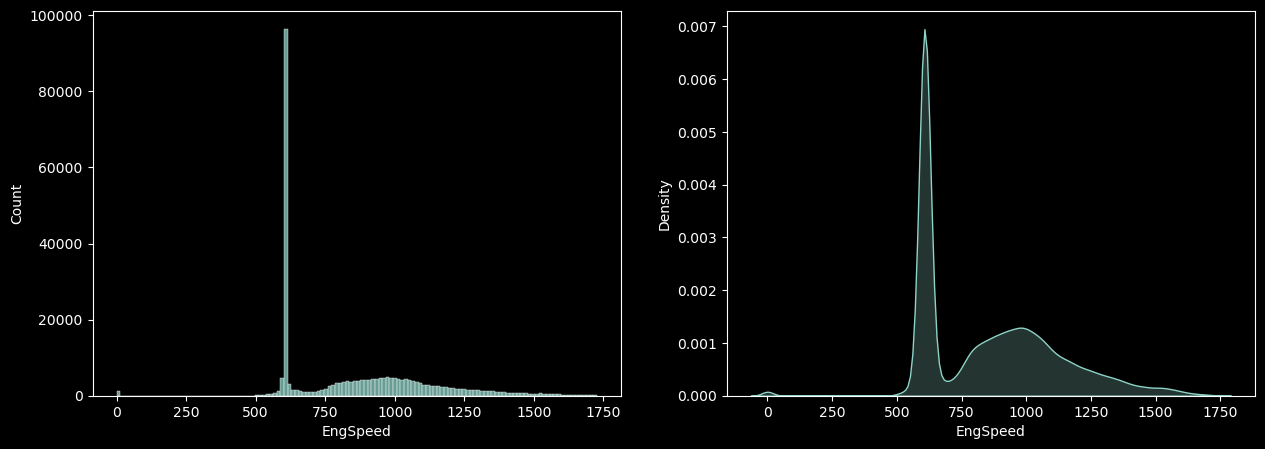

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.EngSpeed, ax=ax[0])
sns.kdeplot(df.EngSpeed, fill=True, ax=ax[1])

<AxesSubplot: >

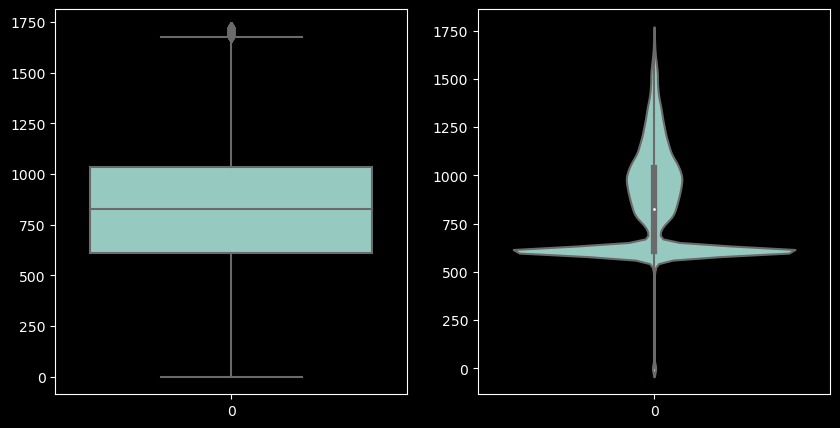

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.EngSpeed, ax=ax[0])
sns.violinplot(df.EngSpeed, ax=ax[1])

#### FrontAxleLeftWheelSpeed [km/h]
High resolution measurement of the speed of the left wheel on the front axle.

<AxesSubplot: xlabel='FrontAxleLeftWheelSpeed', ylabel='Density'>

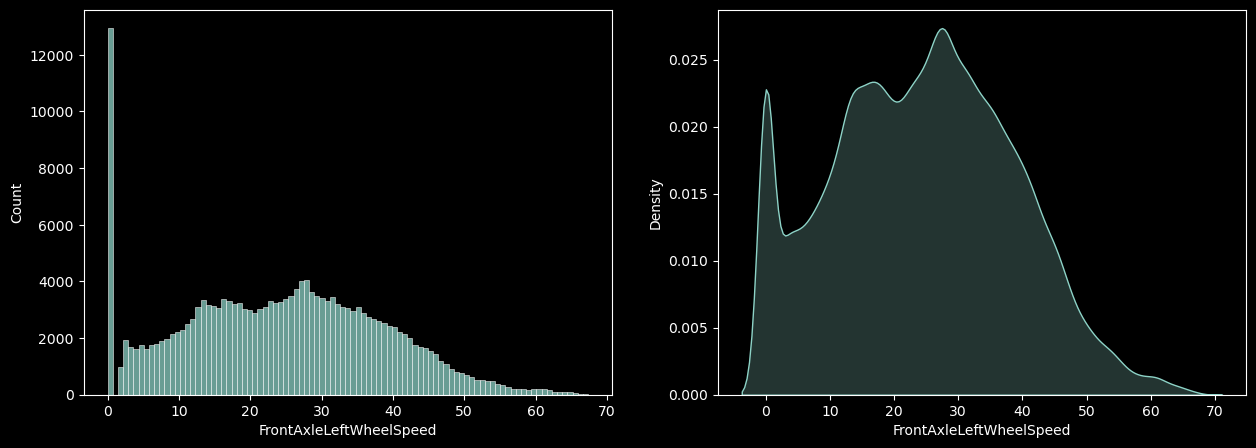

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.FrontAxleLeftWheelSpeed, ax=ax[0])
sns.kdeplot(df.FrontAxleLeftWheelSpeed, fill=True, ax=ax[1])

<AxesSubplot: >

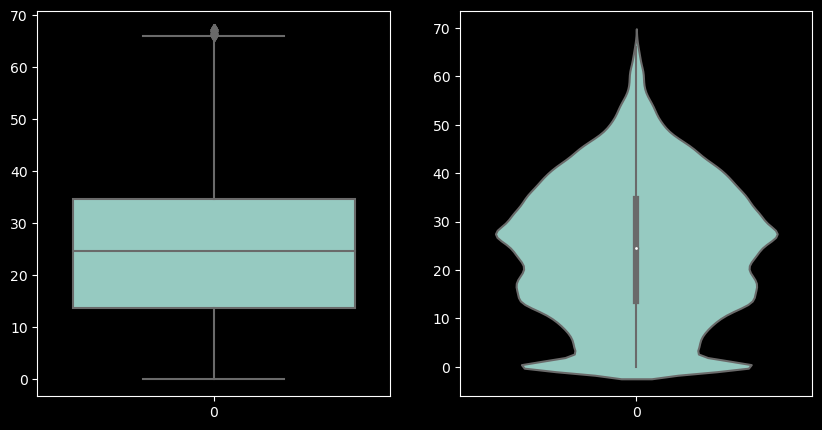

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.FrontAxleLeftWheelSpeed, ax=ax[0])
sns.violinplot(df.FrontAxleLeftWheelSpeed, ax=ax[1])

#### AcceleratorPedalPosition1 [%]
Parameter intended for the primary accelerator control in an application.


<AxesSubplot: xlabel='AcceleratorPedalPosition1', ylabel='Density'>

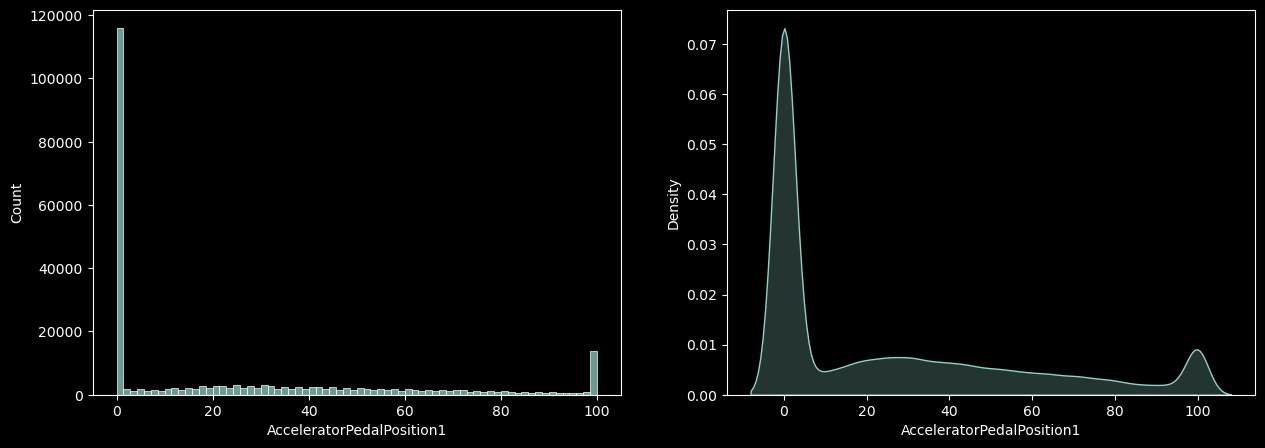

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.AcceleratorPedalPosition1, ax=ax[0])
sns.kdeplot(df.AcceleratorPedalPosition1, fill=True, ax=ax[1])

<AxesSubplot: >

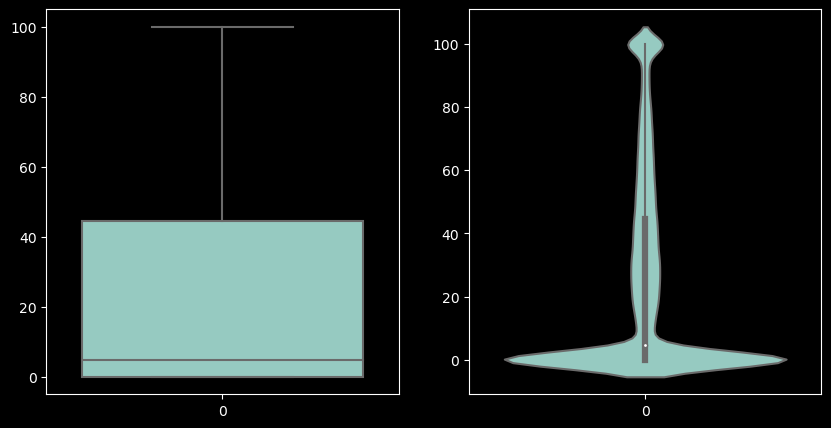

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.AcceleratorPedalPosition1, ax=ax[0])
sns.violinplot(df.AcceleratorPedalPosition1, ax=ax[1])

#### EnginePercentLoadAtCurrentSpeed [%]
The ratio of actual engine percent torque (indicated) to maximum indicated torque available at the current engine speed, clipped to zero torque during engine braking.

<AxesSubplot: xlabel='EnginePercentLoadAtCurrentSpeed', ylabel='Density'>

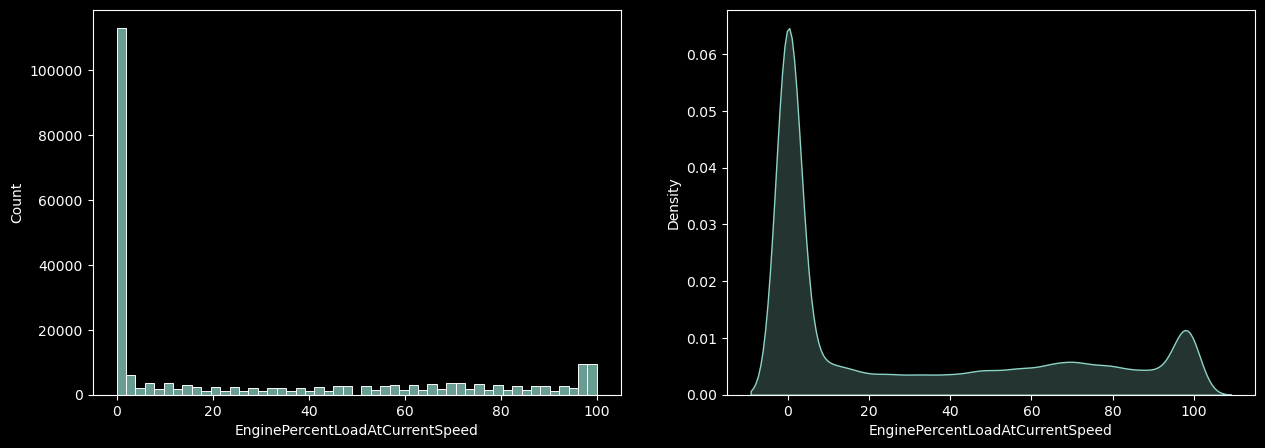

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.EnginePercentLoadAtCurrentSpeed, ax=ax[0])
sns.kdeplot(df.EnginePercentLoadAtCurrentSpeed, fill=True, ax=ax[1])

<AxesSubplot: >

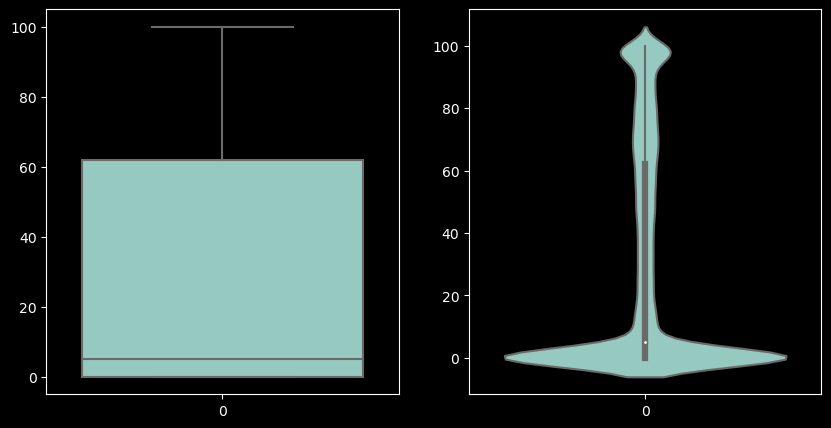

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.EnginePercentLoadAtCurrentSpeed, ax=ax[0])
sns.violinplot(df.EnginePercentLoadAtCurrentSpeed, ax=ax[1])

#### WheelBasedVehicleSpeed [km/h]
Speed of the vehicle as calculated from wheel or tailshaft speed.


<AxesSubplot: xlabel='WheelBasedVehicleSpeed', ylabel='Density'>

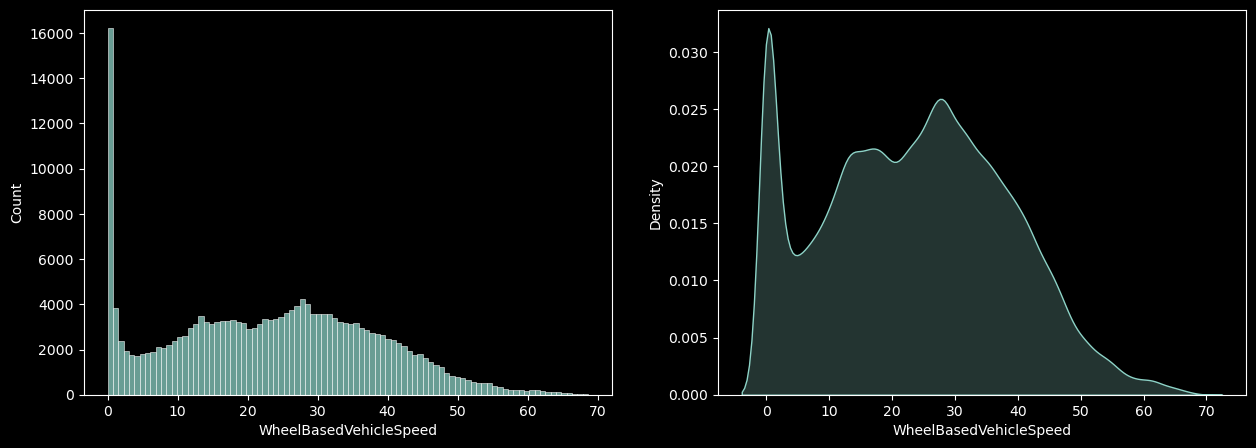

In [23]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.WheelBasedVehicleSpeed, ax=ax[0])
sns.kdeplot(df.WheelBasedVehicleSpeed, fill=True, ax=ax[1])

<AxesSubplot: >

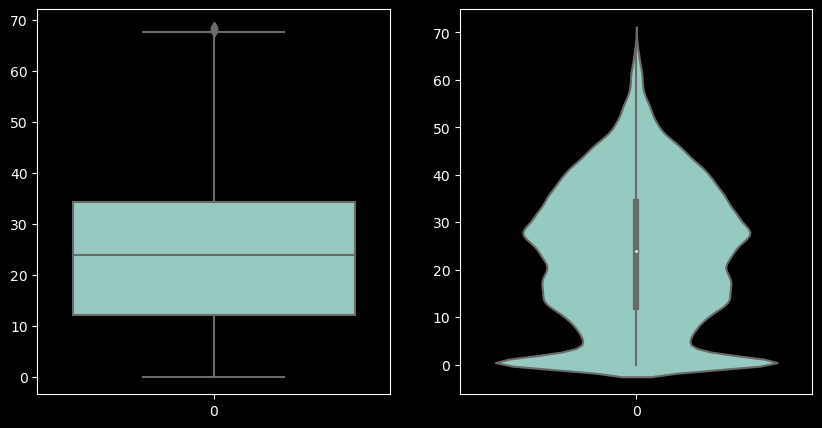

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.WheelBasedVehicleSpeed, ax=ax[0])
sns.violinplot(df.WheelBasedVehicleSpeed, ax=ax[1])

#### HighResolutionTripDistance [m] 
Distance traveled during all or part of a journey.


<AxesSubplot: xlabel='HighResolutionTripDistance', ylabel='Density'>

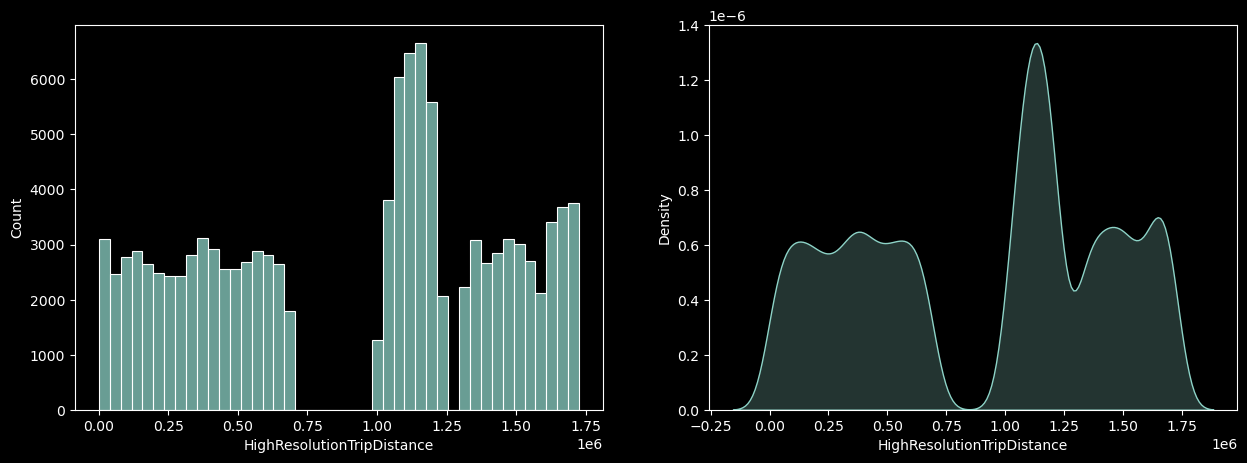

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.HighResolutionTripDistance, ax=ax[0])
sns.kdeplot(df.HighResolutionTripDistance, fill=True, ax=ax[1])

<AxesSubplot: >

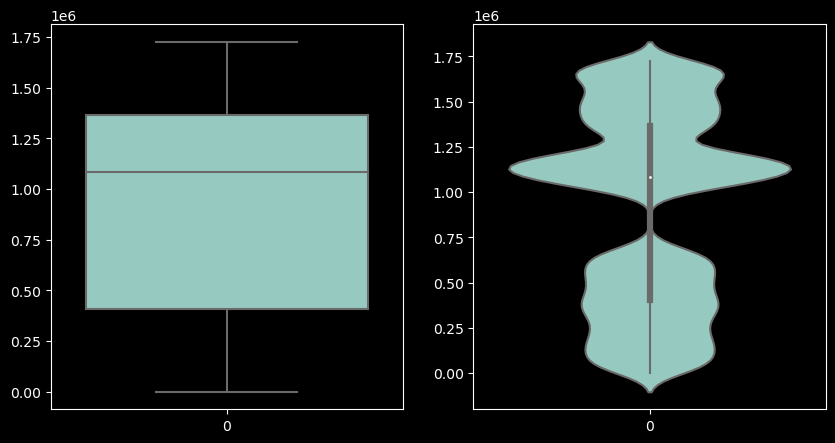

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.HighResolutionTripDistance, ax=ax[0])
sns.violinplot(df.HighResolutionTripDistance, ax=ax[1])

#### EngInstantaneousFuelEconomy [km/L]
Current fuel economy at current vehicle velocity.



<AxesSubplot: xlabel='EngInstantaneousFuelEconomy', ylabel='Density'>

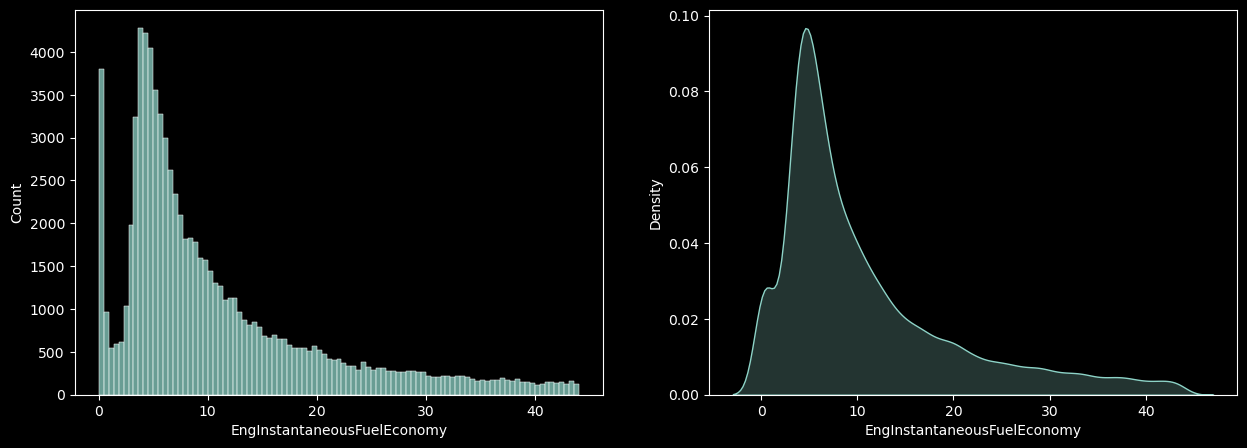

In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.EngInstantaneousFuelEconomy, ax=ax[0])
sns.kdeplot(df.EngInstantaneousFuelEconomy, fill=True, ax=ax[1])

<AxesSubplot: >

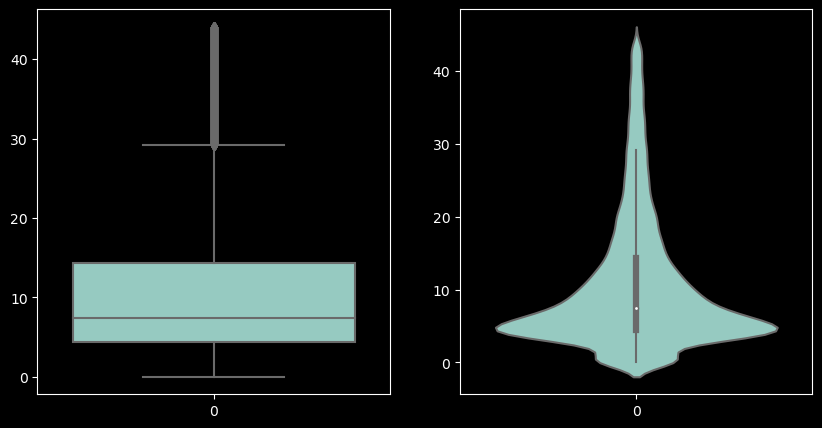

In [28]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.EngInstantaneousFuelEconomy, ax=ax[0])
sns.violinplot(df.EngInstantaneousFuelEconomy, ax=ax[1])

#### HighResolutionEngTotalFuelUsed [l] 
Accumulated amount of fuel used during vehicle operation. 

<AxesSubplot: xlabel='HighResolutionEngTotalFuelUsed', ylabel='Density'>

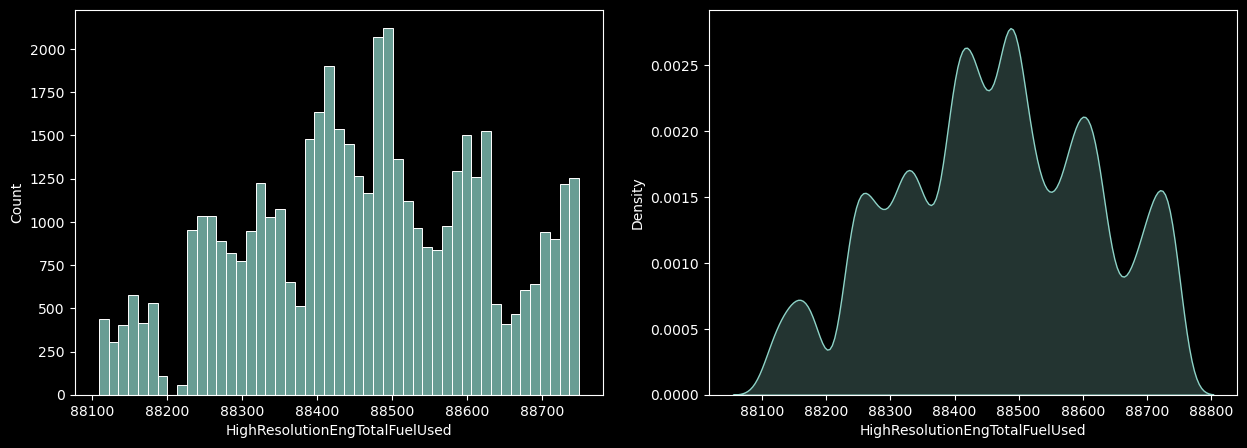

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.HighResolutionEngTotalFuelUsed, ax=ax[0])
sns.kdeplot(df.HighResolutionEngTotalFuelUsed, fill=True, ax=ax[1])

<AxesSubplot: >

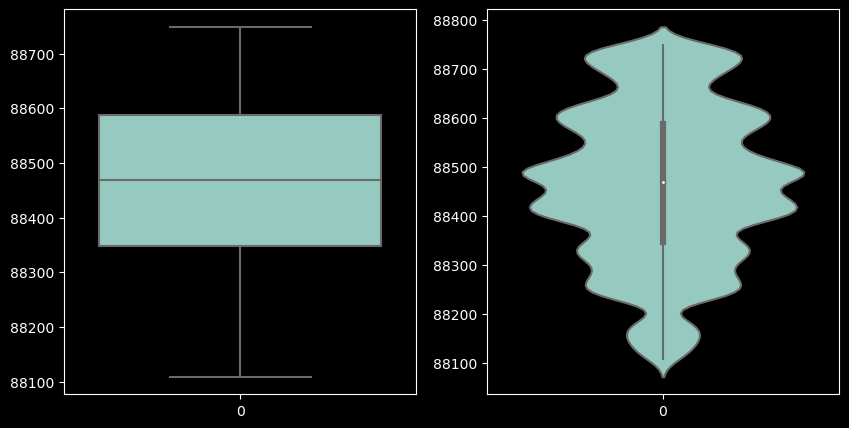

In [30]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.HighResolutionEngTotalFuelUsed, ax=ax[0])
sns.violinplot(df.HighResolutionEngTotalFuelUsed, ax=ax[1])

### Labeled and Unlabeled data split

#### Rows for the last, unknown day: 12.12.2022

In [31]:
unlabeled = df.loc[df['ts'] >= '2022-12-12 00:00:00']
unlabeled

ts  ActualEngPercentTorque  EngSpeed  \
272067  2022-12-12 04:52:14                    43.0   947.125   
272068  2022-12-12 04:52:15                    43.0   962.625   
272069  2022-12-12 04:52:16                    46.0  1012.875   
272070  2022-12-12 04:52:17                    50.0  1123.875   
272071  2022-12-12 04:52:18                    34.0   940.375   
...                     ...                     ...       ...   
319298  2022-12-12 23:24:28                    10.0   608.250   
319299  2022-12-12 23:24:29                    10.0   607.625   
319301  2022-12-12 23:24:31                     0.0   475.000   
319303  2022-12-12 23:24:33                     0.0    39.125   
319304  2022-12-12 23:24:35                     7.0     0.000   

        FrontAxleLeftWheelSpeed  AcceleratorPedalPosition1  \
272067                 6.093750                       44.4   
272068                 6.750000                       44.8   
272069                 7.867188                       47.6   
272070                 8.984375                       53.6   
272071                 9.890625                       43.2   
...                         ...                        ...   
319298                      NaN                        NaN   
319299                      NaN                        0.0   
319301                      NaN                        NaN   
319303                      NaN                        0.0   
319304                      NaN                        0.0   

        EnginePercentLoadAtCurrentSpeed  WheelBasedVehicleSpeed  \
272067                             71.0                6.253906   
272068                             70.0                6.957031   
272069                             71.0                8.156250   
272070                             79.0                9.574219   
272071                             46.0               10.117188   
...                                 ...                     ...   
319298                              NaN                     NaN   
319299                              0.0                     NaN   
319301                              NaN                     NaN   
319303                              0.0                     NaN   
319304                              0.0                     NaN   

        EngInstantaneousFuelEconomy  HighResolutionEngTotalFuelUsed  \
272067                          NaN                             NaN   
272068                          NaN                             NaN   
272069                          NaN                             NaN   
272070                          NaN                             NaN   
272071                          NaN                             NaN   
...                             ...                             ...   
319298                          NaN                             NaN   
319299                          NaN                             NaN   
319301                          NaN                             NaN   
319303                          NaN                             NaN   
319304                          NaN                             NaN   

        HighResolutionTripDistance  
272067                   1007160.0  
272068                         NaN  
272069                   1007165.0  
272070                         NaN  
272071                   1007170.0  
...                            ...  
319298                         NaN  
319299                         NaN  
319301                         NaN  
319303                         NaN  
319304                         NaN  

[44844 rows x 10 columns]

In [32]:
unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44844 entries, 272067 to 319304
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ts                               44844 non-null  object 
 1   ActualEngPercentTorque           43550 non-null  float64
 2   EngSpeed                         43550 non-null  float64
 3   FrontAxleLeftWheelSpeed          26124 non-null  float64
 4   AcceleratorPedalPosition1        33950 non-null  float64
 5   EnginePercentLoadAtCurrentSpeed  33950 non-null  float64
 6   WheelBasedVehicleSpeed           27369 non-null  float64
 7   EngInstantaneousFuelEconomy      0 non-null      float64
 8   HighResolutionEngTotalFuelUsed   0 non-null      float64
 9   HighResolutionTripDistance       18998 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.8+ MB


Indeed the "EngInstantaneousFuelEconomy" and "HighResolutionEngTotalFuelUsed" are missing.

#### Missing data re-check - Unlabeled

In [33]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in unlabeled.columns:
    # count number of rows with missing values
    n_miss = unlabeled[column].isnull().sum()
    perc = n_miss / unlabeled.shape[0] * 100
    # append to dict
    missing_dict[column] = [n_miss, perc.round()]

missing_unlabeled = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_unlabeled

N_Missing [-]  Percentage [%]
ts                                           0             0.0
ActualEngPercentTorque                    1294             3.0
EngSpeed                                  1294             3.0
FrontAxleLeftWheelSpeed                  18720            42.0
AcceleratorPedalPosition1                10894            24.0
EnginePercentLoadAtCurrentSpeed          10894            24.0
WheelBasedVehicleSpeed                   17475            39.0
EngInstantaneousFuelEconomy              44844           100.0
HighResolutionEngTotalFuelUsed           44844           100.0
HighResolutionTripDistance               25846            58.0

#### Rows for the days when all the sensors were connected

In [34]:
labeled = df.loc[df['ts'] < '2022-12-12 00:00:00']
labeled

ts  ActualEngPercentTorque  EngSpeed  \
0       2022-12-01 03:22:22                    21.0   610.500   
1       2022-12-01 03:22:23                    21.0   612.625   
2       2022-12-01 03:22:24                    21.0   605.875   
3       2022-12-01 03:22:25                    20.0   609.875   
4       2022-12-01 03:22:26                    11.0   658.500   
...                     ...                     ...       ...   
272055  2022-12-05 19:46:34                     NaN       NaN   
272056  2022-12-05 19:46:35                     NaN       NaN   
272060  2022-12-05 19:46:41                     NaN       NaN   
272063  2022-12-05 19:47:26                     NaN       NaN   
272066  2022-12-05 19:50:52                     NaN       NaN   

        FrontAxleLeftWheelSpeed  AcceleratorPedalPosition1  \
0                      3.359375                       19.2   
1                      3.929688                       21.2   
2                      4.414062                        5.2   
3                      4.757812                        0.0   
4                      4.156250                        0.0   
...                         ...                        ...   
272055                      NaN                        0.0   
272056                 0.000000                        NaN   
272060                      NaN                        NaN   
272063                 0.000000                        NaN   
272066                 0.000000                        NaN   

        EnginePercentLoadAtCurrentSpeed  WheelBasedVehicleSpeed  \
0                                  33.0                3.238281   
1                                  33.0                3.914062   
2                                  35.0                4.496094   
3                                  33.0                4.972656   
4                                   0.0                4.324219   
...                                 ...                     ...   
272055                              0.0                     NaN   
272056                              NaN                     NaN   
272060                              NaN                     NaN   
272063                              NaN                     NaN   
272066                              NaN                     NaN   

        EngInstantaneousFuelEconomy  HighResolutionEngTotalFuelUsed  \
0                         16.392578                       88108.841   
1                         25.376953                             NaN   
2                         25.685547                       88108.844   
3                         25.697266                       88108.846   
4                         26.904297                             NaN   
...                             ...                             ...   
272055                          NaN                             NaN   
272056                          NaN                             NaN   
272060                          NaN                             NaN   
272063                          NaN                             NaN   
272066                          NaN                             NaN   

        HighResolutionTripDistance  
0                              NaN  
1                        1067825.0  
2                        1067825.0  
3                              NaN  
4                        1067830.0  
...                            ...  
272055                         NaN  
272056                         NaN  
272060                    698670.0  
272063                         NaN  
272066                         NaN  

[246338 rows x 10 columns]

In [35]:
labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246338 entries, 0 to 272066
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ts                               246338 non-null  object 
 1   ActualEngPercentTorque           233177 non-null  float64
 2   EngSpeed                         233177 non-null  float64
 3   FrontAxleLeftWheelSpeed          164561 non-null  float64
 4   AcceleratorPedalPosition1        205504 non-null  float64
 5   EnginePercentLoadAtCurrentSpeed  205504 non-null  float64
 6   WheelBasedVehicleSpeed           171059 non-null  float64
 7   EngInstantaneousFuelEconomy      81798 non-null   float64
 8   HighResolutionEngTotalFuelUsed   47039 non-null   float64
 9   HighResolutionTripDistance       93452 non-null   float64
dtypes: float64(9), object(1)
memory usage: 20.7+ MB


#### Missing data re-check - Labeled

In [36]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in labeled.columns:
    # count number of rows with missing values
    n_miss = labeled[column].isnull().sum()
    perc = n_miss / labeled.shape[0] * 100
    # append to dict
    missing_dict[column] = [n_miss, perc.round()]

missing_labeled = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_labeled

N_Missing [-]  Percentage [%]
ts                                           0             0.0
ActualEngPercentTorque                   13161             5.0
EngSpeed                                 13161             5.0
FrontAxleLeftWheelSpeed                  81777            33.0
AcceleratorPedalPosition1                40834            17.0
EnginePercentLoadAtCurrentSpeed          40834            17.0
WheelBasedVehicleSpeed                   75279            31.0
EngInstantaneousFuelEconomy             164540            67.0
HighResolutionEngTotalFuelUsed          199299            81.0
HighResolutionTripDistance              152886            62.0

### Drop columns:
- 'HighResolutionEngTotalFuelUsed'
- 'HighResolutionTripDistance'

Reason: Little correlation and large percentage is missing

In [37]:
labeled = labeled.drop(['ts', 'HighResolutionEngTotalFuelUsed', 'HighResolutionTripDistance'], axis=1)
unlabeled = unlabeled.drop(['ts', 'HighResolutionEngTotalFuelUsed', 'HighResolutionTripDistance'], axis=1)

### Missing Data Imputation
In our case, the sensor was simply not connected for one day. 
The missing data is: Missing Not at Random (MNAR).

#### Extract only the (X) numerical data

In [38]:
labeled_x = labeled.drop('EngInstantaneousFuelEconomy', axis=1)
unlabeled_x = unlabeled.drop('EngInstantaneousFuelEconomy', axis=1)

#### KNN Imputation

In [39]:
imputer = KNNImputer(n_neighbors=6)

labeled_x = pd.DataFrame(imputer.fit_transform(labeled_x), columns = labeled_x.columns)

In [40]:
unlabeled_x = pd.DataFrame(imputer.transform(unlabeled_x), columns = unlabeled_x.columns)

#### Save the filled DFs to pickles

In [41]:
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

labeled_x.to_pickle(f"./saved/labeled_x_{timestamp}.pkl")
unlabeled_x.to_pickle(f"./saved/unlabeled_x_{timestamp}.pkl")

#### Read the filled DF from pickle

In [42]:
# labeled_x = pd.read_pickle("./saved/labeled_x_20230119-080903.pkl")
# unlabeled_x = pd.read_pickle("./saved/unlabeled_x_20230119-080903.pkl")

# Get the missing y for the labeled data with XGBoost

In [43]:
# reset the index to match KNN-imputed DF without outliers
labeled = labeled.reset_index(drop=True)

missing_y = labeled[labeled.EngInstantaneousFuelEconomy.isnull()].EngInstantaneousFuelEconomy # missing y labels for the labeled X data
missing_ind = missing_y.index # indices of missing y labels
labeled_x_missing = labeled_x.iloc[missing_ind] # DF to predict the missing y labels

# predict unknown y values for the labeled data using supervised model without NaNs
pred_labeled_y = model.predict(labeled_x_missing)
pred_labeled_y = pd.Series(pred_labeled_y, index=missing_ind)

# isolate labeled rows with available y labels
good_ind = list(set(labeled.index) - set(missing_ind))
labeled_y_good = labeled.loc[good_ind].EngInstantaneousFuelEconomy

# concatenate predicted y values with available ones for the labeled data
labeled_y = pd.concat([labeled_y_good, pred_labeled_y]).sort_index()

# Train-Test split

#### Labeled:

In [44]:
X = labeled_x                   # KNN imputed X for the labeled part
y = labeled_y                   # y partly predicted from the supervised, pre-imputation model --> R2 = 0.78
#y = model.predict(labeled_x)   # y fully! predicted from the supervised, pre-imputation model --> R2 = 0.97 (some leakage)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model

In [45]:
model = XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('R2 score: ', r2_score(y_test, predictions).round(2))

R2 score:  0.78


# Grid search
To tune hyperparameters.

In [46]:
# from sklearn.model_selection import GridSearchCV

# parameters = [{'n_estimators':[100, 500, 1000],
#                'learning_rate':[0.05, 0.3, 0.7]}]

# grid_search = GridSearchCV(estimator=model,
#                            param_grid=parameters,
#                            scoring='r2',
#                            cv=10,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

In [47]:
# best_r2 = grid_search.best_score_
# best_r2 # R2 = 0.78

# best_parameters = grid_search.best_params_
# best_parameters # {'learning_rate': 0.05, 'n_estimators': 1000}

# Check approach with full KNN imputation on labeled data

In [48]:
# labeled = pd.read_pickle("./saved/labeled.pkl")

# X = labeled.drop('EngInstantaneousFuelEconomy', axis=1)
# y = labeled.EngInstantaneousFuelEconomy

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model = XGBRegressor()
# model.fit(X_train, y_train)

# predictions = model.predict(X_test)
# print('R2 score: ', r2_score(y_test, predictions).round(2)) #R2 = 0.53

#### Visualization of the prediction

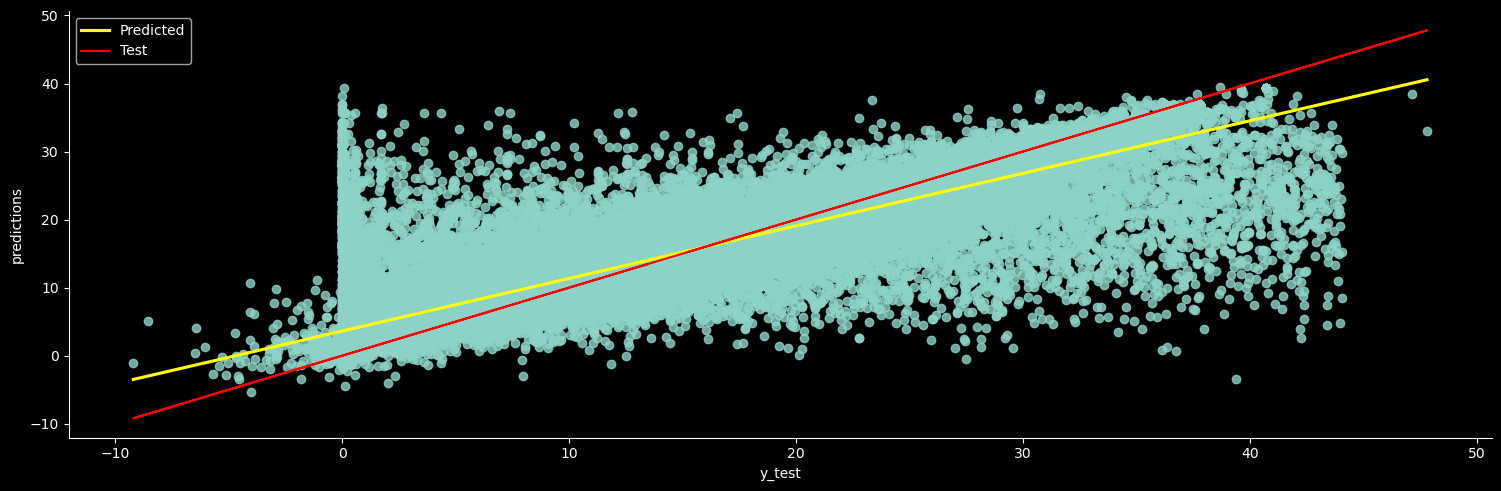

In [49]:
pred_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions})

sns.lmplot(x='y_test', 
           y='predictions', 
           data=pred_df,
           height=5, 
           aspect=3,
           line_kws={'color': 'yellow', 'label':'Predicted'});

plt.plot(y_test, y_test, c='red', label='Test')
plt.legend()

#### Results distribution

<AxesSubplot: ylabel='Density'>

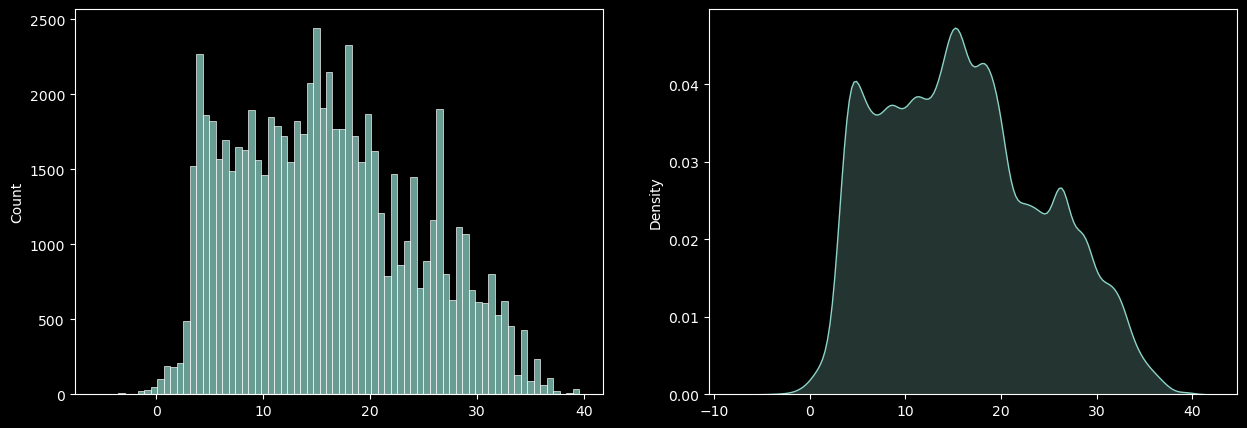

In [50]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(predictions, ax=ax[0])
sns.kdeplot(predictions, fill=True, ax=ax[1])

#### Residuals

(-10.0, 10.0)

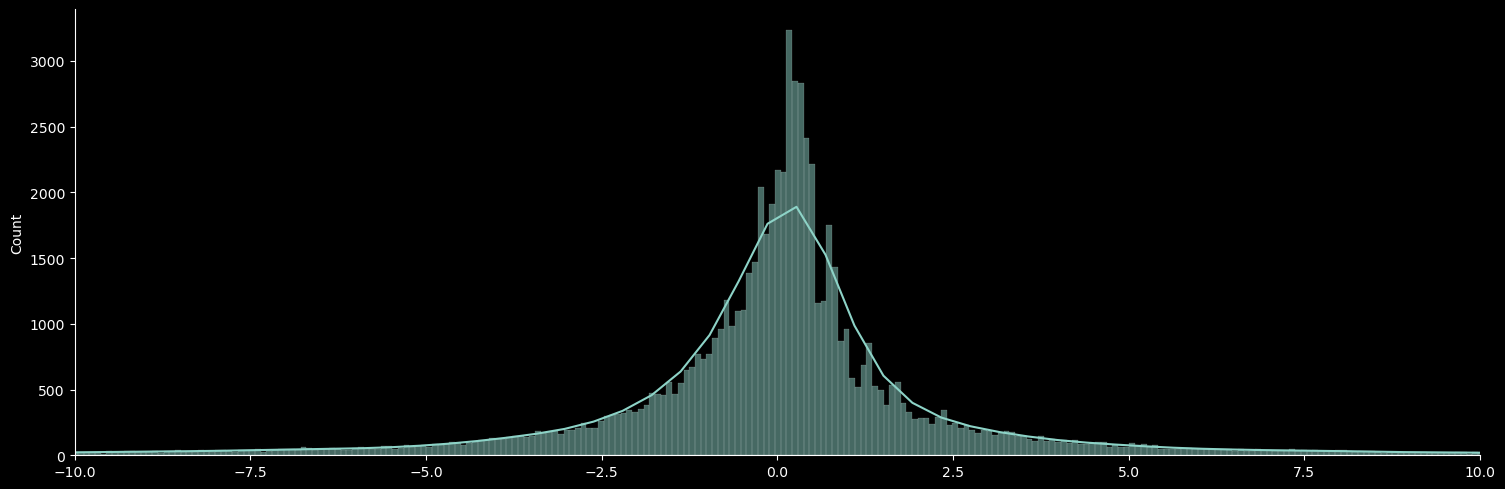

In [51]:
sns.displot(y_test-predictions, aspect=3, kde=True)
plt.xlim(-10, 10)

#### Every 500th ts-measurement - visual check:

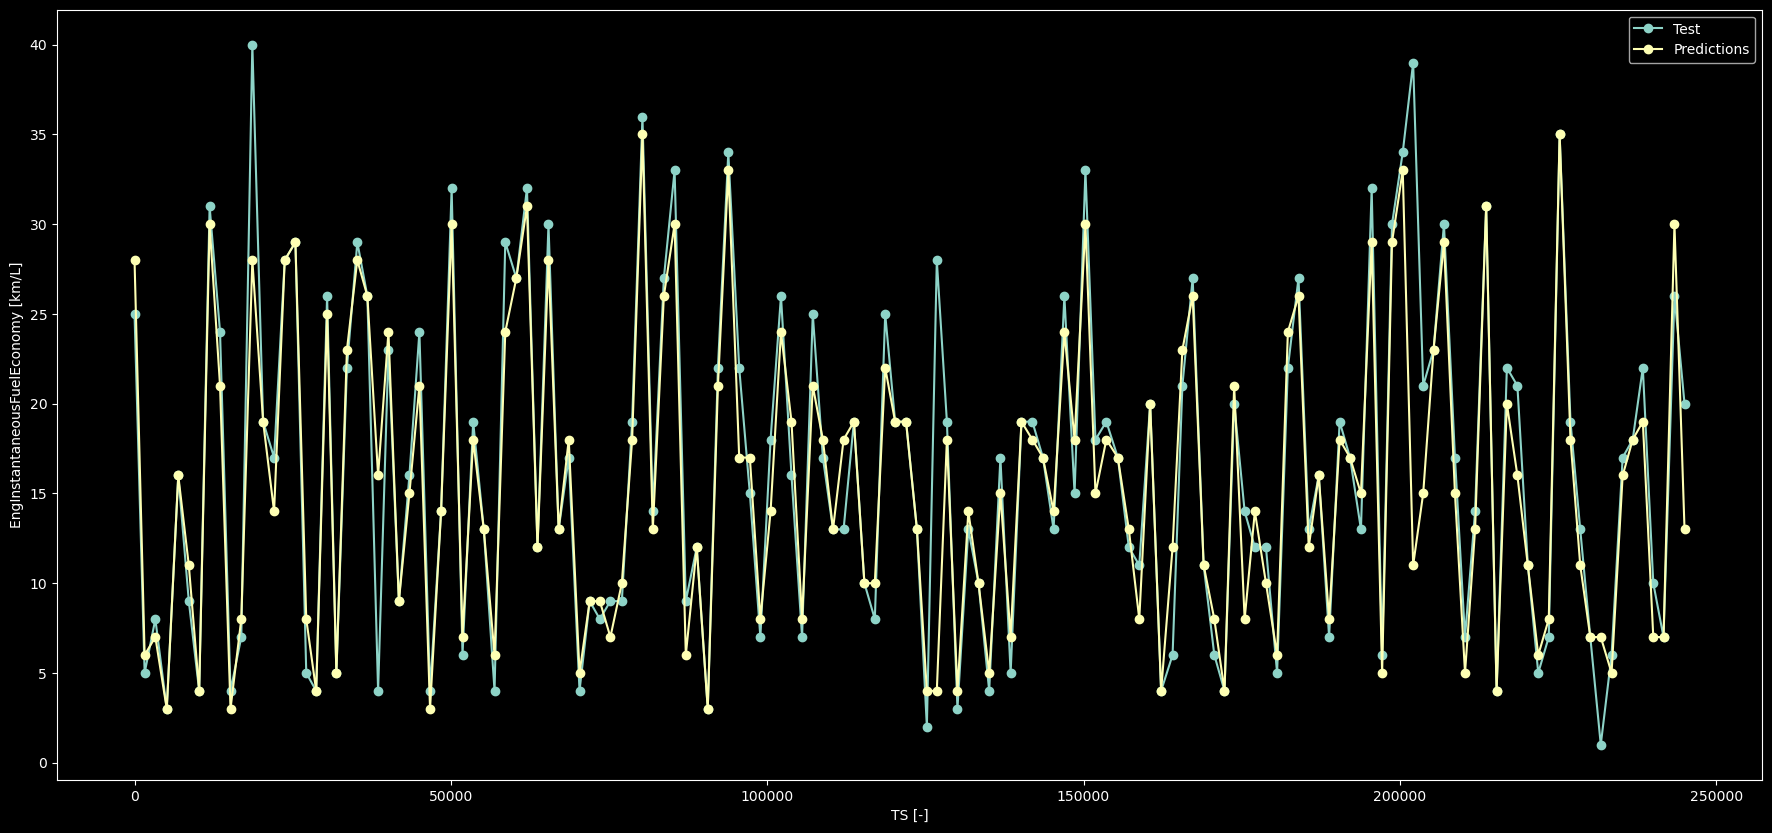

In [52]:
results = pd.DataFrame({'Test': y_test.round(), 'Predictions': predictions.round()})
results.sort_index(inplace=True)

plt.figure(figsize=(22,10))
plt.plot(results.index[::500], results['Test'][::500], '-o', label='Test')
plt.plot(results.index[::500], results['Predictions'][::500], '-o', label='Predictions')
plt.xlabel('TS [-]')
plt.ylabel('EngInstantaneousFuelEconomy [km/L]')
plt.legend()
plt.show()

It looks like our prediction capability has the tendency to UNDER-estimate the Engine Instantaneous Fuel economy.

# Prediction on unlabeled data (for the last day)
With new index.

In [53]:
predictions = model.predict(unlabeled_x)
predictions_df = pd.DataFrame(predictions, columns=['Predicted EngInstantaneousFuelEconomy'])

#### Results distribution

<AxesSubplot: xlabel='Predicted EngInstantaneousFuelEconomy', ylabel='Density'>

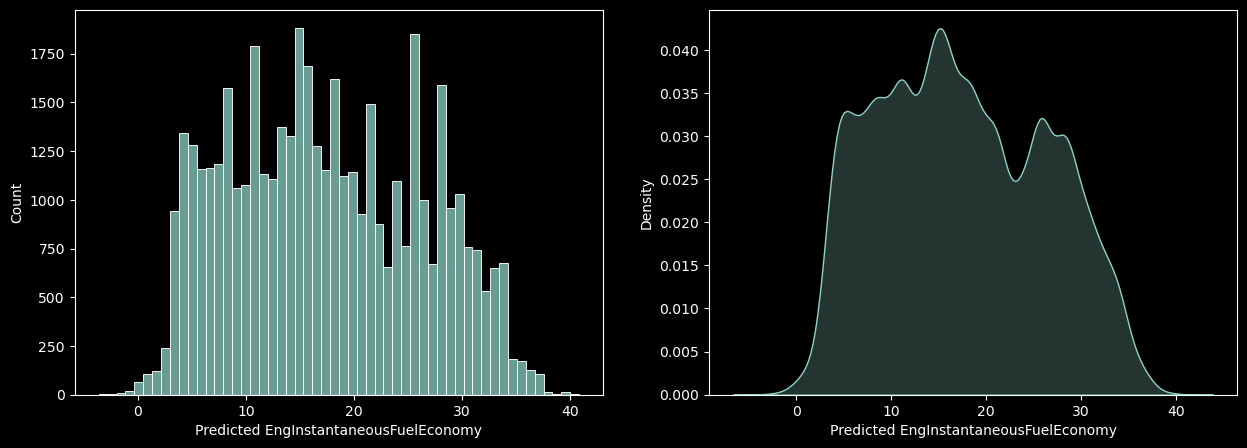

In [54]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(predictions_df['Predicted EngInstantaneousFuelEconomy'], ax=ax[0])
sns.kdeplot(predictions_df['Predicted EngInstantaneousFuelEconomy'], fill=True, ax=ax[1])

#### Save final predictions for 12-12-2022 as .csv

In [55]:
predictions_df.to_csv("./saved/Predictions-for-12-12-2022-xgb.csv")

In [60]:
predictions_df

Predicted EngInstantaneousFuelEconomy
0                                  11.345834
1                                   8.062894
2                                   8.112974
3                                   6.553619
4                                  16.004675
...                                      ...
44839                              11.058307
44840                              25.675840
44841                              34.839767
44842                              33.061703
44843                              25.023987

[44844 rows x 1 columns]